# Measures of shape - Skewness and Kurtosis

## Skewness



It is the __degree of distortion/measure of asymmetry__ from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution. It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.

There are two types of Skewness: Positive and Negative.

![](1_skewness.PNG)

__Positive Skewness__ means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.  
__Negative Skewness__ is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

### So, when is the skewness too much?
The rule of thumb seems to be:
- If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
- If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
- If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

![](1_skew_right.PNG)


> If the peak of the distribution was left of the average value, portraying a positive skewness in the distribution. It would mean that many houses were being sold for less than the average value

> If the peak of the distributed data was right of the average value, that would mean a negative skew. This would mean that the houses were being sold for more than the average value.

![](1_skewness_code.PNG)

![](1_skewness_log.PNG)

The skewed data can reduce the performance of the machine learning models - __It affects the regression intercept, coefficients associated with the model.__. Therfore we make a log transformation to remove the skewness.

A transformation may be used to reduce skewness.  A distribution that is symmetric or nearly so is often easier to handle and
interpret than a skewed distribution. More specifically, a normal or Gaussian distribution is often regarded as ideal as it is assumed by many statistical methods.

> To reduce right skewness, take roots or logarithms or reciprocals (roots are weakest). This is the commonest problem in practice.

> To reduce left skewness, take squares or cubes or higher powers.

__Important : If you log transform the response variable, it is required to also log transform feature variables that are skewed.__



***

##### [Transforming Skewed Data for Machine Learning](https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0)

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import shapiro,norm, boxcox
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
os.getcwd()

'C:\\Users\\Jeswin\\Documents\\Github\\Python DS notes\\Statistics'

In [3]:
df=pd.read_csv("..\\data\\house_prices.csv")

In [4]:
df = df[['SalePrice', 'GrLivArea',  'LotArea']]
df.head()

,SalePrice,GrLivArea,LotArea
0,208500,1710,8450
1,181500,1262,9600
2,223500,1786,11250
3,140000,1717,9550
4,250000,2198,14260


Finding the skew and normality 

In [5]:
cols_skew_norm = []
for col in df.columns:
    a = np.where(shapiro(df[col])[1]>0.05, 'Normal distribution', 'Not normal')
    cols_skew_norm.append((col, df[col].skew(),a))
    
check_df = pd.DataFrame(cols_skew_norm, columns = ['column', 'skew', 'Normality'])
check_df

,column,skew,Normality
0,SalePrice,1.882876,Not normal
1,GrLivArea,1.366560,Not normal
2,LotArea,12.207688,Not normal


### Box Cox Transformation

An alternative to manually trying a variety of transformations is the Box Cox transformation. For each variable, a Box Cox transformation estimates the value lambda from -5 to 5 that maximizes the normality of the data using the equation below.

$$ y(\lambda) = \begin{cases}\frac{y^\lambda-1}{\lambda} & \lambda \neq 0\\log(y) & \lambda = 0\end{cases} $$    

For negative values of lambda, the transformation performs a variant of the reciprocal of the variable. At a lambda of zero, the variable is log transformed, and for positive lambda values, the variable is transformed the power of lambda. We can apply “boxcox” to all the skewed variables in the given dataframe using [Scipy.stats boxcox](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html).

__To use it the data must be positive.__

`boxcox(x, lmbda=None, alpha=None)`

- lmbda = None: If lmbda is None, find the lambda that maximizes the log-likelihood function and return it as the second output argument.

If lmbda is not None, do the transformation for that value.  
- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

In [6]:
boxcox(df['SalePrice'])[1]  # lambda that maximizes the log-likelihood function.

-0.07692391328663316

In [7]:
boxcox(df['SalePrice'])[0] 

array([7.93261046, 7.87826333, 7.95961804, ..., 8.02738182, 7.78100579,
       7.79588702])

In [8]:
df.columns

Index(['SalePrice', 'GrLivArea', 'LotArea'], dtype='object')

In [9]:
cols_skew_norm_2 = []
for col in df.columns:
    df[col] = boxcox(df[col])[0]
    p_value = shapiro(df[col])[1]
    a = np.where(shapiro(df[col])[1]>0.05, 'Normal distribution', 'Not normal')
    cols_skew_norm_2.append((col, df[col].skew(),p_value,a))
    
check_df2 = pd.DataFrame(cols_skew_norm_2, columns = ['column', 'skew', 'shapiro-p-value','Normality'])
check_df2

,column,skew,shapiro-p-value,Normality
0,SalePrice,-0.008653,1.906368e-07,Not normal
1,GrLivArea,0.000195,8.689268e-04,Not normal
2,LotArea,0.026687,3.012058e-29,Not normal


#### Need to check why Shapiro test failed above

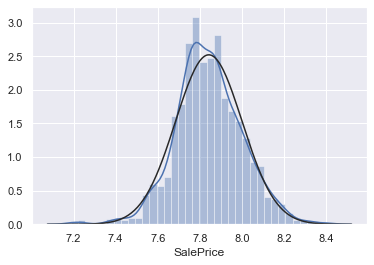

In [10]:
sns.distplot(df['SalePrice'], fit = norm)

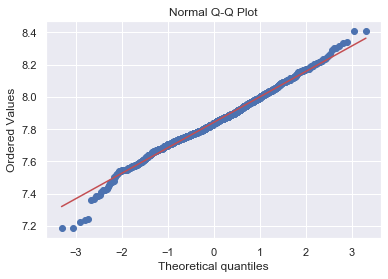

In [11]:
import scipy.stats as stats
stats.probplot(df['SalePrice'], dist="norm", plot=plt);
plt.title("Normal Q-Q Plot");

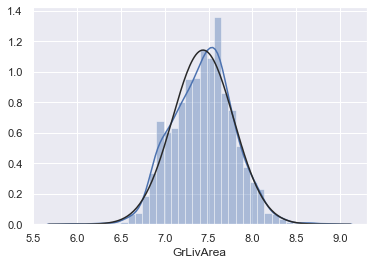

In [12]:
sns.distplot(df['GrLivArea'], fit = norm)

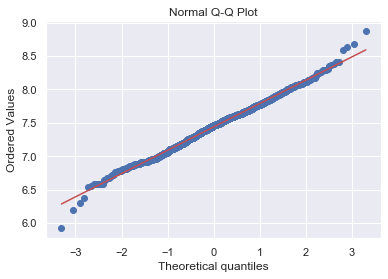

In [13]:
stats.probplot(df['GrLivArea'], dist="norm", plot=plt);
plt.title("Normal Q-Q Plot");

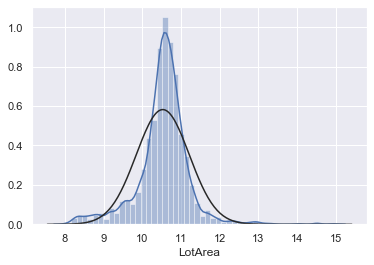

In [14]:
sns.distplot(df['LotArea'], fit = norm)

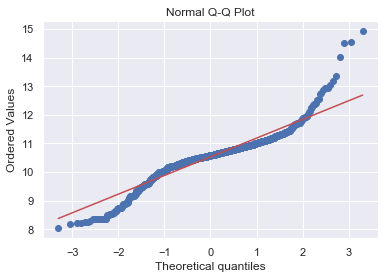

In [15]:
stats.probplot(df['LotArea'], dist="norm", plot=plt);
plt.title("Normal Q-Q Plot");

***

## Kurtosis

Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is actually the measure of outliers present in the distribution.

__High kurtosis (+ve value)__ in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then, we need to investigate why do we have so many outliers. 

__Low kurtosis (-ve value)__ in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.

This heaviness or lightness in the tails usually means that your data looks flatter (or less flat) compared to the normal distribution. The standard normal distribution has a kurtosis of 3 (or 0 if  Fisher's Kurtosis), so if your values are close to that then your graph’s tails are nearly normal. These distributions are called mesokurtic.

> The [pandas library function kurtosis()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.kurt.html) computes the Fisher's Kurtosis which is obtained by subtracting the Pearson's Kurtosis by three. With Fisher's Kurtosis, definition a normal distribution has a kurtosis of 0.


> The main difference between skewness and kurtosis is that the skewness refers to the degree of symmetry, whereas the kurtosis refers to the degree of presence of outliers in the distribution.

Reference:
1. [Skew and Kurtosis: 2 Important Statistics terms you need to know in Data Science](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)
2. [Transforming Skewed Data](https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16)
3. [How to deal with Skewed Dataset in Machine Learning?](https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc)
4. [Transformations and their need in ML](http://fmwww.bc.edu/repec/bocode/t/transint.html)
5. [Understanding Descriptive Statistics](https://towardsdatascience.com/understanding-descriptive-statistics-c9c2b0641291)
6. [StatsHow To - Kurtosis](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/kurtosis-leptokurtic-platykurtic/)


FYI

__Measure of central tendency:__ Mean, Median, Mode, AM, GM, HM

__Measure of dispersion:__ Range, Variance, Standard deviation

__Measure of spred:__ Skewness, Kurtosis